# 데이터 분석 프로젝트

##### 공통 진행
- 문제 파악하기
- 데이터 수집 또는 준비
- EDA 탐색적 자료 분석

##### 개별 진행
- 데이터 전처리
- 데이터 분석
- 머신 러닝 모델링
- 결과 분석 및 보고서 작성 후 제출 (개인별 강의 평가자료에 활용)
- 모든 작업 내용 팀원간 공유 및 피드백 적극 활용

##### 결과 발표
- 팀원 모두의 결과를 취합하여 포트폴리오 작성 후 제출
   (팀 포트폴리오 자료 및 발표자료)
 - 발표자료 준비하여 발표

In [347]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sh = pd.read_csv('Sleep_health.csv')
sh.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [348]:
sh_in = sh[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
            'Stress Level', 'Heart Rate', 'Daily Steps']].to_numpy()

sh_tar = sh['Sleep Disorder'].to_numpy()

## 시각화

C:\Users\jongyeon.woo\AppData\Local\Temp\ipykernel_3576\161992253.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sh.corr(), annot=True, cmap='coolwarm', fmt='.2f')


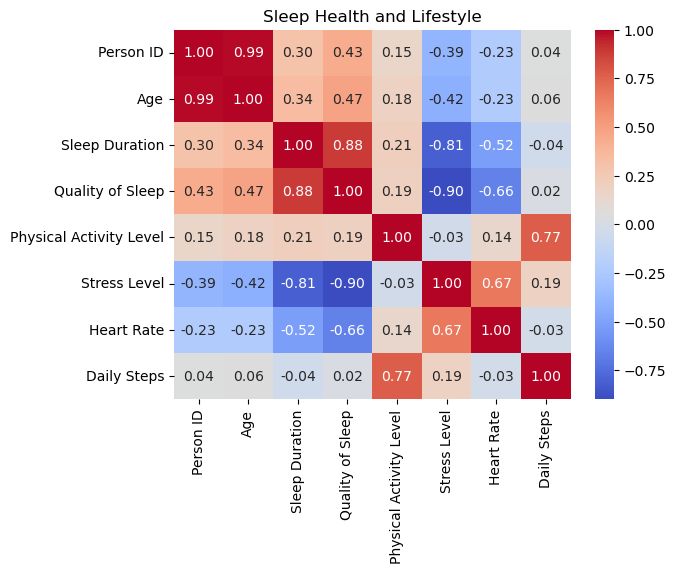

In [431]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sh.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sleep Health and Lifestyle')
plt.show()

## 데이터 나누기

In [349]:
from sklearn.model_selection import train_test_split

tr_in, te_in, tr_tar, te_tar = train_test_split(
            sh_in, sh_tar, test_size = 0.4, random_state = 45)

In [350]:
tr_s, te_s, tr_val, te_val = train_test_split(
        tr_in, tr_tar, test_size = 0.2, random_state = 42)

## 결정트리

In [351]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(tr_s, tr_val)

print('훈련모델 결과:', dt.score(tr_s, tr_val))
print('테스트 결과:', dt.score(te_s, te_val))

훈련모델 결과: 0.9329608938547486
테스트 결과: 0.8444444444444444


## 교차검증

In [352]:
from sklearn.model_selection import train_test_split

tr_in, te_in, tr_tar, te_tar = train_test_split(
            sh_in, sh_tar, test_size = 0.2, random_state = 42)

In [353]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)

In [354]:
from sklearn.model_selection import cross_validate, StratifiedKFold
 
splitter = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
    
scores = cross_validate(dt, tr_in, tr_tar, return_train_score=True, cv=splitter)
scores

{'fit_time': array([0.00398779, 0.00298977, 0.00299263, 0.00199389, 0.00199389,
        0.00199461, 0.00199556, 0.00099659, 0.00099754, 0.00199485]),
 'score_time': array([0.00199103, 0.00199533, 0.00099635, 0.00099826, 0.        ,
        0.0009973 , 0.00099802, 0.0009973 , 0.        , 0.        ]),
 'test_score': array([0.9       , 0.86666667, 0.86666667, 0.9       , 0.93333333,
        0.86666667, 0.96666667, 0.9       , 0.86666667, 0.93103448]),
 'train_score': array([0.9330855 , 0.94052045, 0.93680297, 0.9330855 , 0.92936803,
        0.92936803, 0.92565056, 0.9330855 , 0.94052045, 0.93333333])}

In [345]:
print('훈련모델 결과:', np.mean(scores['train_score']))
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9334820322180917
테스트 결과: 0.8997701149425288


## 그리드서치

In [364]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

par = {'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005]}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), par, n_jobs=-1)
gs.fit(tr_in, tr_tar)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_impurity_decrease': [0.0001, 0.0002, 0.0003,
                                                   0.0004, 0.0005]})

In [366]:
dt = gs.best_estimator_
dt.score(tr_in, tr_tar)

0.9331103678929766

In [368]:
gs.best_params_

{'min_impurity_decrease': 0.0003}

In [369]:
gs.cv_results_['mean_test_score']

array([0.85960452, 0.86960452, 0.87627119, 0.87627119, 0.87627119])

In [370]:
best_idx = np.argmax(gs.cv_results_['mean_test_score'])
gs.cv_results_['params'][best_idx]

{'min_impurity_decrease': 0.0003}

In [372]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

par = {'min_impurity_decrease': uniform(0.0001, 0.001),
      'max_depth': randint(20, 50),
      'min_samples_split': randint(2, 25),
      'min_samples_leaf': randint(1, 25),
      }

gs = RandomizedSearchCV(DecisionTreeClassifier(random_state = 42), par,
                       n_iter = 100, n_jobs = -1, random_state = 42)
gs.fit(tr_in, tr_tar)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CFFA5EC820>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002CFFA536D10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CFFA5EEFB0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002CFFA5ECAF0>},
                   random_state=42)

In [373]:
gs.best_params_

{'max_depth': 26,
 'min_impurity_decrease': 0.0010367299887367345,
 'min_samples_leaf': 1,
 'min_samples_split': 12}

In [374]:
np.max(gs.cv_results_['mean_test_score'])

0.8928813559322034

In [376]:
dt = gs.best_estimator_

print('훈련모델 결과:', dt.score(tr_in, tr_tar))
print('테스트 결과:', dt.score(te_in, te_tar))

훈련모델 결과: 0.9163879598662207
테스트 결과: 0.8666666666666667


## 랜덤 포레스트

In [394]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(rf, tr_in, tr_tar, return_train_score=True, n_jobs = -1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9347803347280335
테스트 결과: 0.9030508474576271


### 랜덤 포레스트 자체 모델 평가 점수

In [405]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(tr_in, tr_tar)
rf.oob_score_

0.9096989966555183

### 랜덤 포레스트 특성 중요도 확인

In [408]:
rf.fit(tr_in, tr_tar)
rf.feature_importances_

array([0.22610066, 0.26903094, 0.07691061, 0.12302514, 0.07664463,
       0.11635183, 0.11193618])

## 엑스트라 트리

In [402]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(et, tr_in, tr_tar, return_train_score=True, n_jobs = -1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9347803347280335
테스트 결과: 0.8763276836158191


### 엑스트라 트리 특성 중요도

In [406]:
et.fit(tr_in, tr_tar)
et.feature_importances_

array([0.19394849, 0.16965603, 0.12738387, 0.16448887, 0.1088483 ,
       0.10699795, 0.12867648])

## 그레이디언트 부스팅

In [401]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, tr_in, tr_tar, return_train_score=True, n_jobs = -1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9339435146443513
테스트 결과: 0.8929943502824859


### 학습률 조정

In [403]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, 
                                random_state=42)
scores = cross_validate(gb, tr_in, tr_tar, return_train_score=True, n_jobs = -1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9347803347280335
테스트 결과: 0.8996610169491526


### 그레이디언트 부스팅 특성 중요도

In [407]:
gb.fit(tr_in, tr_tar)
gb.feature_importances_

array([0.32051547, 0.19183706, 0.00980091, 0.34558264, 0.00865856,
       0.07113742, 0.05246794])

## 히스토그램 기반 그레이디언트 부스팅

In [404]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, tr_in, tr_tar, return_train_score=True, n_jobs=-1)

print('훈련모델 결과:', np.mean(scores['train_score'])) 
print('테스트 결과:', np.mean(scores['test_score']))

훈련모델 결과: 0.9347803347280335
테스트 결과: 0.8829943502824857


### 훈련 세트 특성 중요도 확인

In [411]:
from sklearn.inspection import permutation_importance

hgb.fit(tr_in, tr_tar)
result = permutation_importance(hgb, tr_in, tr_tar, n_repeats=10,
                                random_state=42, n_jobs=-1)
result.importances_mean

array([ 0.1541806 ,  0.18461538, -0.0006689 ,  0.05451505,  0.00200669,
        0.0826087 ,  0.04314381])

### 테스트 세트 특성 중요도 확인

In [413]:
result = permutation_importance(hgb, te_in, te_tar, n_repeats=10,
                                random_state=42, n_jobs=-1)
result.importances_mean

array([ 0.19733333,  0.16533333, -0.00266667,  0.044     , -0.012     ,
        0.05733333,  0.016     ])

## 다중 회귀

In [415]:
from sklearn.preprocessing import LabelEncoder

lab_en = LabelEncoder()

tr_tar_en = lab_en.fit_transform(tr_tar)
te_tar_en = lab_en.transform(te_tar)

In [424]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(tr_in, tr_tar_en)

print('훈련모델 결과:', lr.score(tr_in, tr_tar_en))
print('테스트 결과:', lr.score(te_in, te_tar_en))

훈련모델 결과: 0.3707040182333474
테스트 결과: 0.2561187425927255


## 릿지 회귀

In [425]:
from sklearn.linear_model import Ridge

rdg = Ridge()
rdg.fit(tr_in, tr_tar_en)
print('훈련모델 결과:', rdg.score(tr_in, tr_tar_en))
print('테스트 결과:', rdg.score(te_in, te_tar_en))

훈련모델 결과: 0.37069511353572226
테스트 결과: 0.2555012326287296


## 라쏘 회귀

In [427]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(tr_in, tr_tar_en)

print('훈련모델 결과:', ls.score(tr_in, tr_tar_en))
print('테스트 결과:', ls.score(te_in, te_tar_en))

훈련모델 결과: 0.20783210337679436
테스트 결과: 0.023657338249602367


# 결과

#### 이전에 활용했던 모델 중 9종류의 모델을 사용해 본 결과,

#### 결정트리
    - 훈련모델: 0.9329608938547486
    - 테스트: 0.8444444444444444
    - 결과 차이: 0.0885164494103042, 약 0.088

#### 그리드서치
    - 훈련모델 결과: 0.9163879598662207
    - 테스트 결과: 0.8666666666666667
    - 결과 차이: 0.049721293199554, 약 0.049

#### 랜덤 포레스트
    - 훈련모델 결과: 0.9347803347280335
    - 테스트 결과: 0.9030508474576271
    - 결과 차이: 0.0317294872704064, 약 0.031

#### 엑스트라 트리
    - 훈련모델 결과: 0.9347803347280335
    - 테스트 결과: 0.8763276836158191
    - 결과 차이: 0.0584526511122144, 약 0.058

#### 그레이디언트 부스팅
    - 훈련모델 결과: 0.9339435146443513
    - 테스트 결과: 0.8929943502824859
    - 결과 차이: 0.0409491643618654, 약 0.04

#### 히스토그램 기반 그레이디언트 부스팅
    - 훈련모델 결과: 0.9347803347280335
    - 테스트 결과: 0.8829943502824857
    - 결과 차이: 0.0517859844455478, 약 0.051

#### 다중 회귀
    - 훈련모델 결과: 0.3707040182333474
    - 테스트 결과: 0.2561187425927255
    - 결과 차이: 0.1145852756406219, 약 0.114

#### 릿지 회귀
    - 훈련모델 결과: 0.37069511353572226
    - 테스트 결과: 0.2555012326287296
    - 결과 차이: 0.1151938809069926, 약 0.115

#### 라쏘 회귀
    - 훈련모델 결과: 0.20783210337679436
    - 테스트 결과: 0.023657338249602367
    - 결과 차이: 0.184174765127192, 약 0.184

- 각각의 모델 결과 차이를 보면 0.031로 랜덤 포레스트가 근접하고, 
- 라쏘 회귀가 0.184로 서로 차이가 많이 나는 것을 알 수 있다.
- 또한, 다중 회귀, 릿지 회귀, 라쏘 회귀의 결과값들이 낮은 것을 볼 수 있다.